In [66]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.simplefilter(action = 'ignore', category = RuntimeWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi
pd.set_option('display.max_columns', 23)
pd.set_option('display.max_rows', 300)
covid = pd.read_csv('covid_19_data.csv')
covid_2 = pd.read_csv('covid_19_data.csv')
covid['ObservationDate'] = pd.to_datetime(covid['ObservationDate'])
covid.drop(axis = 1, columns = ['Last Update'], inplace = True)

#covid['Country/Region'].value_counts()

In [67]:
'''Region distribution used for the analysis'''

Asia = ['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Japan', 'South Korea', 'Mongolia', 
     'Thailand', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Indonesia', 'Cambodia', 
     'Brunei', 'Laos', 'Timor-Leste', 'India', 'Nepal', 'Sri Lanka', 'Pakistan', 
     'Bangladesh', 'Bhutan', 'Maldives', 'Afghanistan', 'Kazakhstan', 'Uzbekistan', 'Kyrgyzstan', 
     'Tajikistan']  # Asia Region

North_America = ['US', 'Canada', 'Mexico', 'Guatemala', 'Honduras', 'El Salvador', 'Nicaragua', 'Costa Rica', 
     'Panama']  # North America Region

South_America = ['Brazil', 'Colombia', 'Argentina', 'Chile', 'Peru', 'Ecuador', 'Paraguay', 'Uruguay', 
     'Bolivia', 'Venezuela', 'Guyana', 'Suriname', 'French Guiana']  # South America Region

Europe = ['UK', 'Ireland', 'France', 'Germany', 'Italy', 'Spain', 'Portugal', 'Netherlands', 'Belgium', 
     'Switzerland', 'Austria', 'Sweden', 'Denmark', 'Norway', 'Finland', 'Iceland', 'Luxembourg', 
     'Monaco', 'Andorra', 'Malta', 'Liechtenstein', 'San Marino', 'Vatican City', 'Russia', 
     'Ukraine', 'Belarus', 'Moldova', 'Georgia', 'Armenia', 'Azerbaijan', 'Poland', 'Czech Republic', 
     'Slovakia', 'Hungary', 'Romania', 'Bulgaria', 'Slovenia', 'Croatia', 'Bosnia and Herzegovina', 
     'Serbia', 'Montenegro', 'North Macedonia', 'Albania', 'Kosovo', 'Turkey', 'Greece', 'Cyprus'] # Europe Region

Africa = ['Egypt', 'Algeria', 'Morocco', 'Tunisia', 'Libya', 'South Africa', 'Nigeria', 'Ghana', 'Kenya', 
     'Ethiopia', 'Uganda', 'Tanzania', 'Zambia', 'Zimbabwe', 'Malawi', 'Botswana', 'Namibia', 
     'Eswatini', 'Lesotho', 'Rwanda', 'Burundi', 'Mozambique', 'Angola', 
     'Sudan', 'South Sudan', 'Ivory Coast', 'Senegal', 'Cameroon', 'Togo', 'Burkina Faso', 'Mali', 
     'Niger', 'Gabon', 'Guinea', 'Guinea-Bissau', 'Sierra Leone', 'Liberia', 'Chad', 'Mauritania', 
     'Eritrea', 'Djibouti', 'Somalia', 'Central African Republic', 'Republic of the Congo', 'Sao Tome and Principe', 
     'Seychelles', 'Comoros', 'Madagascar'] # Africa Region

Oceania = ['Australia', 'New Zealand', 'Papua New Guinea', 'Fiji']  # Oceania Region

Caribbean = ['Jamaica', 'Cuba', 'Dominican Republic', 'Haiti', 'The Bahamas', 'Barbados', 'Trinidad and Tobago', 
     'Saint Lucia', 'Saint Vincent and the Grenadines', 'Antigua and Barbuda', 'Grenada', 'Dominica', 
     'Saint Kitts and Nevis', 'Aruba', 'Curacao', 'Cayman Islands', 'Guadeloupe', 'Martinique', 
     'Saint Barthelemy', 'St. Martin']  # Caribbean Region

Cruise_Ships = ['Diamond Princess', 'MS Zaandam'] # Cruise Ships Region

In [68]:
'''0 - function to investigate cases in a country'''
def investigate_country(df, country, style):
    get_month = lambda x: x.month_name()
    country_group = df.groupby('Country/Region')
    country_df = country_group.get_group(country)
    dfs = country_df.resample('ME', on = 'ObservationDate').agg({'Confirmed' : 'sum', 'Deaths' : 'sum', 'Recovered' : 'sum'})
    dfs.rename(columns = {'Confirmed' : f'{country} Confirmed Cases', 'Deaths' : f'Deaths in {country}', 
                                           'Recovered' : f'Recoveries in {country}'}, inplace = True)
    dfs.rename(index = get_month, inplace = True)
    dfs.rename_axis('Observation Month', inplace = True)
    
    dfs[f'{country} Confirmed Cases'] = dfs[f'{country} Confirmed Cases'].apply(round)
    dfs[f'Deaths in {country}'] = dfs[f'Deaths in {country}'].apply(round)
    dfs[f'Recoveries in {country}'] = dfs[f'Recoveries in {country}'].apply(round)
    if style == True:
        return dfs.style.background_gradient()
    else:
        return dfs

investigate_country(covid, 'US', True)
US = investigate_country(covid, 'US', False)
US.style.background_gradient()

,US Confirmed Cases,Deaths in US,Recoveries in US
Observation Month,,,
January,37,0,0
February,718,1,88
March,1086846,18202,19364
April,19518497,960515,1747977
May,45213338,2693823,8720047
June,19080601,1092623,4962162


In [ ]:
# Extra - Calculating total active cases in a country
# def active2(df, name):
#     index = df.index
#     current = []
#     a = df.loc[index[0], f'{name} Confirmed Cases'] - df.loc[index[0], f'Deaths in {name}'] - df.loc[index[0], f'Recoveries in {name}']
#     current.append(a)
#     b = a + df.loc[index[1], f'{name} Confirmed Cases'] - df.loc[index[1], f'Deaths in {name}'] - df.loc[index[1], f'Recoveries in {name}']
#     current.append(b)
#     c = b + df.loc[index[2], f'{name} Confirmed Cases'] - df.loc[index[2], f'Deaths in {name}'] - df.loc[index[2], f'Recoveries in {name}']
#     current.append(c)
#     d = c + df.loc[index[3], f'{name} Confirmed Cases'] - df.loc[index[3], f'Deaths in {name}'] - df.loc[index[3], f'Recoveries in {name}']
#     current.append(d)
#     if len(index) == 4:
#         pass
#     else:
#         e = d + df.loc[index[4], f'{name} Confirmed Cases'] - df.loc[index[4], f'Deaths in {name}'] - df.loc[index[4], f'Recoveries in {name}']
#         current.append(e)
#     if len(index) == 5 or len(index) == 4:
#         pass
#     else:
#         f = e + df.loc[index[5], f'{name} Confirmed Cases'] - df.loc[index[5], f'Deaths in {name}'] - df.loc[index[5], f'Recoveries in {name}']
#         current.append(f)
#     df[f'Active Cases in {name}'] = current
#     return df
#     df.plot()

# active2(US, 'US')

In [69]:
#2. Function to investigate death in various regions - singly
def investigate_region(countries_list, original_df, region_txt, style):
    covid_country = original_df.set_index('Country/Region', drop = False)
    region_df = covid_country.loc[countries_list]
    
    reg_df_list = [region_df]
    reg_txt_list = [region_txt]

    zip_reg = [*zip(reg_df_list, reg_txt_list)]
    month = lambda x: x.month_name()
    
    
    for country, name in zip_reg:
        dfs = country.resample('ME', on = 'ObservationDate').agg({'Confirmed' : 'sum', 'Deaths' : 'sum', 'Recovered' : 'sum'})
        dfs.rename(index = month, columns = {'Confirmed' : f'{name} Region Confirmed Cases', 'Deaths' : f'Deaths in {name} Region', 
                                           'Recovered' : f'Recoveries in {name} Region'}, inplace = True)
        dfs.rename_axis('Observation Month', inplace = True)
        dfs[f'{name} Region Confirmed Cases'] = dfs[f'{name} Region Confirmed Cases'].apply(round)
        dfs[f'Deaths in {name} Region'] = dfs[f'Deaths in {name} Region'].apply(round)
        dfs[f'Recoveries in {name} Region'] = dfs[f'Recoveries in {name} Region'].apply(round)
        
        if style == True:
            return dfs.style.background_gradient()
        else:
            return dfs

investigate_region(['Nigeria', 'Morocco', 'Sudan', 'Rwanda'], covid, 'Africa', True)

,Africa Region Confirmed Cases,Deaths in Africa Region,Recoveries in Africa Region
Observation Month,,,
February,2,0,0
March,5233,224,154
April,98647,4469,15316
May,468506,14919,169391
June,265319,8964,129945


In [70]:
#3. Function to investigate death in various regions - multiple at once
region_dict = {}
def investigate_region(countries_list, original_df, region_txt, style):
    zip_reg = [*zip(countries_list, region_txt)]
    for countriez_list, regionz_txt  in zip_reg:
        covid_country = original_df.set_index('Country/Region', drop = False)
        region_df = covid_country.loc[countriez_list]
        
        reg_df_list = [region_df]
        reg_txt_list = [regionz_txt]
    
        zip_region = [*zip(reg_df_list, reg_txt_list)]
        month = lambda x: x.month_name()
        
        for country, name in zip_region:
            dfs = country.resample('ME', on = 'ObservationDate').agg({'Confirmed' : 'sum', 'Deaths' : 'sum', 'Recovered' : 'sum'})
            dfs.rename(index = month, columns = {'Confirmed' : f'{name} Region Confirmed Cases', 'Deaths' : f'Deaths in {name} Region', 
                                               'Recovered' : f'Recoveries in {name} Region'}, inplace = True)
            dfs.rename_axis('Observation Month', inplace = True)
            dfs[f'{name} Region Confirmed Cases'] = dfs[f'{name} Region Confirmed Cases'].apply(round)
            dfs[f'Deaths in {name} Region'] = dfs[f'Deaths in {name} Region'].apply(round)
            dfs[f'Recoveries in {name} Region'] = dfs[f'Recoveries in {name} Region'].apply(round)
            
            if style == True:
                region_dict[name] =  dfs.style.background_gradient()
            else:
                region_dict[name] = dfs

investigate_region([['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Japan', 'South Korea', 'Mongolia', 
     'Thailand', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Indonesia', 'Cambodia', 
     'Brunei', 'Laos', 'Timor-Leste', 'India', 'Nepal', 'Sri Lanka', 'Pakistan', 
     'Bangladesh', 'Bhutan', 'Maldives', 'Afghanistan', 'Kazakhstan', 'Uzbekistan', 'Kyrgyzstan', 
     'Tajikistan'],  # Asia

    ['US', 'Canada', 'Mexico', 'Guatemala', 'Honduras', 'El Salvador', 'Nicaragua', 'Costa Rica', 
     'Panama'],  # North America

    ['Brazil', 'Colombia', 'Argentina', 'Chile', 'Peru', 'Ecuador', 'Paraguay', 'Uruguay', 
     'Bolivia', 'Venezuela', 'Guyana', 'Suriname', 'French Guiana'],  # South America

    ['UK', 'Ireland', 'France', 'Germany', 'Italy', 'Spain', 'Portugal', 'Netherlands', 'Belgium', 
     'Switzerland', 'Austria', 'Sweden', 'Denmark', 'Norway', 'Finland', 'Iceland', 'Luxembourg', 
     'Monaco', 'Andorra', 'Malta', 'Liechtenstein', 'San Marino', 'Vatican City', 'Russia', 
     'Ukraine', 'Belarus', 'Moldova', 'Georgia', 'Armenia', 'Azerbaijan', 'Poland', 'Czech Republic', 
     'Slovakia', 'Hungary', 'Romania', 'Bulgaria', 'Slovenia', 'Croatia', 'Bosnia and Herzegovina', 
     'Serbia', 'Montenegro', 'North Macedonia', 'Albania', 'Kosovo', 'Turkey', 'Greece', 'Cyprus'],  # Europe

    ['Egypt', 'Algeria', 'Morocco', 'Tunisia', 'Libya', 'South Africa', 'Nigeria', 'Ghana', 'Kenya', 
     'Ethiopia', 'Uganda', 'Tanzania', 'Zambia', 'Zimbabwe', 'Malawi', 'Botswana', 'Namibia', 
     'Eswatini', 'Lesotho', 'Rwanda', 'Burundi', 'Mozambique', 'Angola', 
     'Sudan', 'South Sudan', 'Ivory Coast', 'Senegal', 'Cameroon', 'Togo', 'Burkina Faso', 'Mali', 
     'Niger', 'Gabon', 'Guinea', 'Guinea-Bissau', 'Sierra Leone', 'Liberia', 'Chad', 'Mauritania', 
     'Eritrea', 'Djibouti', 'Somalia', 'Central African Republic', 'Republic of the Congo', 'Sao Tome and Principe', 
     'Seychelles', 'Comoros', 'Madagascar'],  # Africa

    ['Australia', 'New Zealand', 'Papua New Guinea', 'Fiji'],  # Oceania

    ['Jamaica', 'Cuba', 'Dominican Republic', 'Haiti', 'The Bahamas', 'Barbados', 'Trinidad and Tobago', 
     'Saint Lucia', 'Saint Vincent and the Grenadines', 'Antigua and Barbuda', 'Grenada', 'Dominica', 
     'Saint Kitts and Nevis', 'Aruba', 'Curacao', 'Cayman Islands', 'Guadeloupe', 'Martinique', 
     'Saint Barthelemy', 'St. Martin'],  # Caribbean

    ['Diamond Princess', 'MS Zaandam']] # Cruise Ships

                   
    , covid, ['Asia', 'North America', 'South America', 'Europe', 'Africa', 'Oceania', 'Caribbean', 'Cruise Ships'], False)
region_dict['Africa'].style.background_gradient()

,Africa Region Confirmed Cases,Deaths in Africa Region,Recoveries in Africa Region
Observation Month,,,
January,1,0,0
February,23,0,2
March,39451,1171,2904
April,564097,26949,140126
May,2540873,83247,990145
June,1731013,48596,773686


In [71]:
'''4 - Calculating total active cases'''
# Note active cases is derived from (Confirmed cases - Deaths - Recoveries). It is a running total, that changes in each month
# based on the deaths and recoveries.

def active(df, name):
    index = df.index
    current = []
    a = df.loc[index[0], f'{name} Region Confirmed Cases'] - df.loc[index[0], f'Deaths in {name} Region'] - df.loc[index[0], f'Recoveries in {name} Region']
    current.append(a)
    b = a + df.loc[index[1], f'{name} Region Confirmed Cases'] - df.loc[index[1], f'Deaths in {name} Region'] - df.loc[index[1], f'Recoveries in {name} Region']
    current.append(b)
    c = b + df.loc[index[2], f'{name} Region Confirmed Cases'] - df.loc[index[2], f'Deaths in {name} Region'] - df.loc[index[2], f'Recoveries in {name} Region']
    current.append(c)
    d = c + df.loc[index[3], f'{name} Region Confirmed Cases'] - df.loc[index[3], f'Deaths in {name} Region'] - df.loc[index[3], f'Recoveries in {name} Region']
    current.append(d)
    if len(index) == 4:
        pass
    else:
        e = d + df.loc[index[4], f'{name} Region Confirmed Cases'] - df.loc[index[4], f'Deaths in {name} Region'] - df.loc[index[4], f'Recoveries in {name} Region']
        current.append(e)
    if len(index) == 5 or len(index) == 4:
        pass
    else:
        f = e + df.loc[index[5], f'{name} Region Confirmed Cases'] - df.loc[index[5], f'Deaths in {name} Region'] - df.loc[index[5], f'Recoveries in {name} Region']
        current.append(f)
    df[f'Active Cases in {name} Region'] = current
    return df

# active(region_dict['Africa', 'Africa'])
for region in region_dict:
    active(region_dict[region], region)
    
region_dict['Africa'].style.background_gradient()


,Africa Region Confirmed Cases,Deaths in Africa Region,Recoveries in Africa Region,Active Cases in Africa Region
Observation Month,,,,
January,1,0,0,1
February,23,0,2,22
March,39451,1171,2904,35398
April,564097,26949,140126,432420
May,2540873,83247,990145,1899901
June,1731013,48596,773686,2808632


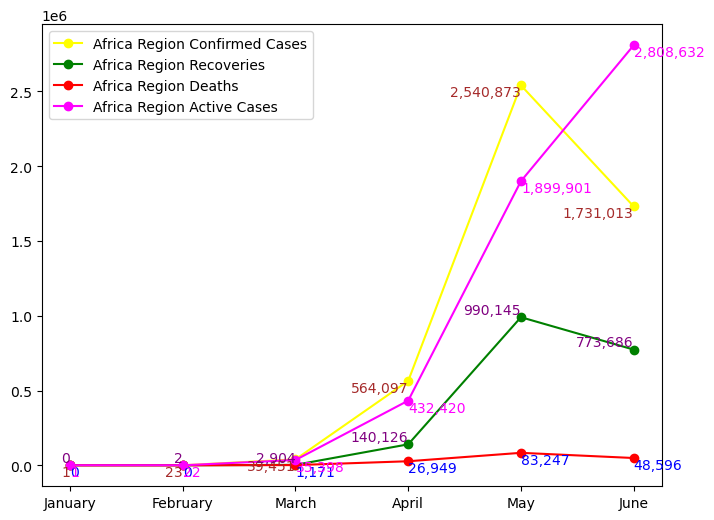

In [72]:
''''5 -  annotating plot function'''

def label_graph(df, name):
    fig = plt.figure(figsize = (8,6))
    plt.plot(df.index, df[f'{name} Region Confirmed Cases'], marker='o', color='yellow', label=f'{name} Region Confirmed Cases')
    plt.plot(df.index, df[f'Recoveries in {name} Region'], marker='o', color='green', label=f'{name} Region Recoveries')
    plt.plot(df.index, df[f'Deaths in {name} Region'], marker='o', color='red', label= f'{name} Region Deaths')
    plt.plot(df.index, df[f'Active Cases in {name} Region'], marker='o', color='magenta', label= f'{name} Region Active Cases')
    for i in range(len(df)):
       plt.text(df.index[i], df[f'{name} Region Confirmed Cases'][i], f"{df[f'{name} Region Confirmed Cases'][i]:,}", color='brown', fontsize=10, ha='right', va = 'top')
       plt.text(df.index[i], df[f'Recoveries in {name} Region'][i], f"{df[f'Recoveries in {name} Region'][i]:,}", color='purple', fontsize=10, ha='right', va = 'bottom')
       plt.text(df.index[i], df[f'Deaths in {name} Region'][i], f"{df[f'Deaths in {name} Region'][i]:,}", color='blue', fontsize=10, ha='left', va = 'top')
       plt.text(df.index[i], df[f'Active Cases in {name} Region'][i], f"{df[f'Active Cases in {name} Region'][i]:,}", color='magenta', fontsize=10, ha='left', va = 'top')
       plt.legend()
       #plt.grid()
#active(Asia_sum, 'Asia Region')

label_graph(region_dict['Africa'], 'Africa')

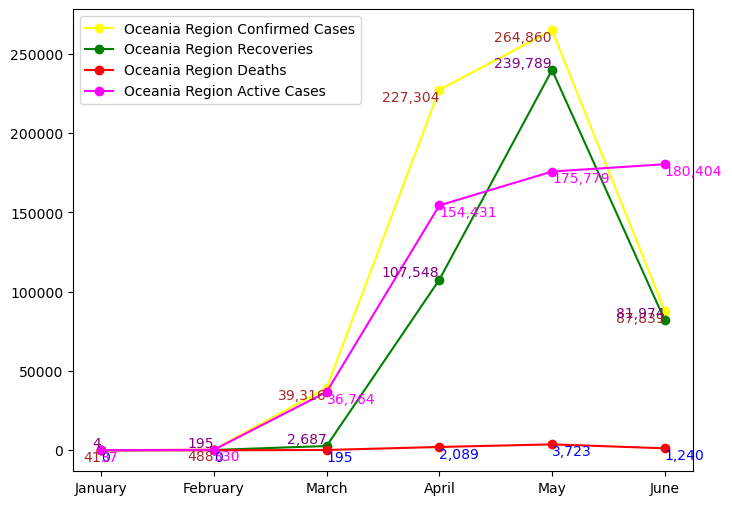

In [73]:
label_graph(region_dict['Oceania'], 'Oceania')

In [ ]:
# # horsing around with the regions

# # Investigating by independence time

# investigate_region([
#     ['US'],  # 1700s  
#     ['Haiti'],  # Early 1800s  
#     ['Argentina', 'Colombia', 'Mexico', 'Brazil', 'Peru', 'Venezuela', 'Chile'],  # Early to Mid-1800s  
#     ['Canada', 'Dominican Republic'],  # Mid to Late 1800s  
#     ['Australia', 'New Zealand', 'Cuba', 'Panama'],  # Late 1800s to Early 1900s  
#     ['Ireland', 'Egypt', 'Saudi Arabia'],  # 1920s  
#     ['Iraq'],  # 1930s  
#     ['Lebanon', 'Syria', 'Philippines'],  # 1940s  
#     ['India', 'Pakistan', 'Sri Lanka', 'Israel', 'South Korea', 'Indonesia', 'Vietnam', 'Laos', 
#      'Cambodia'],  # Late 1940s to Early 1950s  
#     ['Libya'],  # 1950s  
#     ['Ghana', 'Malaysia', 'Guinea', 'Ivory Coast', 'Somalia', 'Nigeria', 'Senegal', 'Togo', 'Burkina Faso', 'Cameroon', 
#      'Congo (Kinshasa)', 'Mali', 'Madagascar', 'Chad', 'Congo (Brazzaville)', 'Central African Republic', 'Gabon', 
#      'Mauritania', 'Niger'],  # 1960s (African Independence Movements)  
#     ['Jamaica', 'Trinidad and Tobago', 'Algeria', 'Kenya', 'Malawi', 'Zambia', 'Malta', 'Gambia', 'Singapore', 
#      'Botswana', 'Lesotho', 'Guyana', 'Barbados'],  # Mid to Late 1960s  
#     ['United Arab Emirates', 'Bangladesh', 'Bahrain', 'Qatar'],  # Early 1970s  
#     ['Mozambique', 'Angola', 'Seychelles', 'Suriname'],  # Mid to Late 1970s  
#     ['Zimbabwe'],  # 1980s  
#     ['Namibia'],  # 1990s  
#     ['Eritrea', 'Palestine', 'East Timor', 'South Sudan']]  # 2000s to 2010s

#     , covid, ['1700s', 'Early 1800s', 'Early to Mid-1800s', 'Mid to Late 1800s', 'Late 1800s to Early 1900s', 
#     '1920s', '1930s', '1940s', 'Late 1940s to Early 1950s', '1950s', '1960s', 'Mid to Late 1960s', 
#     'Early 1970s', 'Mid to Late 1970s', '1980s', '1990s', '2000s to 2010s'], True)
# region_dict['1960s']


# # By tourist site
# investigate_region([['France', 'Spain', 'US', 'Mainland China', 'Italy', 'Turkey', 'Mexico', 'Germany', 'Thailand', 'UK'],  # Most visited  
#     ['Japan', 'Austria', 'Greece', 'Russia', 'Malaysia', 'Canada', 'Saudi Arabia', 'Netherlands', 'Poland', 'South Korea'],  
#     ['India', 'Indonesia', 'South Africa', 'Switzerland', 'Brazil', 'Portugal', 'Egypt', 'Czech Republic', 'Hong Kong', 'Vietnam'],  
#     ['United Arab Emirates', 'Australia', 'Morocco', 'Singapore', 'Hungary', 'Denmark', 'Belgium', 'Sweden', 'Ireland', 'New Zealand'],  
#     ['Argentina', 'Chile', 'Colombia', 'Peru', 'Philippines', 'Malta', 'Israel', 'Croatia', 'Norway', 'Finland'],  
#     ['Nepal', 'Sri Lanka', 'Qatar', 'Ukraine', 'Ecuador', 'Jordan', 'Lebanon', 'Dominican Republic', 'Bahrain', 'Cambodia'],  
#     ['Senegal', 'Algeria', 'Tunisia', 'Ivory Coast', 'Oman', 'Kuwait', 'Panama', 'Armenia', 'Slovenia', 'Azerbaijan'],  
#     ['Costa Rica', 'Bosnia and Herzegovina', 'Georgia', 'Paraguay', 'Maldives', 'Lithuania', 'Estonia', 'Luxembourg', 'Latvia', 'Belarus'],  
#     ['Botswana', 'Tanzania', 'Kenya', 'Namibia', 'Zambia', 'Zimbabwe', 'Uganda', 'Rwanda', 'Gabon', 'Ethiopia'],  
#     ['Fiji', 'Papua New Guinea', 'Mozambique', 'Burkina Faso', 'Cameroon', 'Benin', 'Gambia', 'Guinea', 'Mali', 'Togo'],  
#     ['Saint Lucia', 'Saint Vincent and the Grenadines', 'Grenada', 'Antigua and Barbuda', 'Saint Kitts and Nevis', 'Barbados',  
#      'Bahamas', 'Trinidad and Tobago', 'Cuba', 'Jamaica'],  
#     ['Curacao', 'Aruba', 'Guadeloupe', 'Martinique', 'French Guiana', 'Cayman Islands', 'Puerto Rico', 'St. Martin', 'Dominica'],  
#     ['Malawi', 'Chad', 'Liberia', 'Sierra Leone', 'Central African Republic', 'Congo (Kinshasa)', 'Congo (Brazzaville)', 'Gabon',  
#      'Equatorial Guinea', 'Djibouti'],  
#     ['Seychelles', 'Mauritius', 'Comoros', 'Mayotte', 'Reunion'],  
#     ['Vatican City', 'Holy See', 'Western Sahara', 'Diamond Princess', 'MS Zaandam']]
#     , covid, ['Most visited', 'Highly popular', 'Moderately popular', 'Emerging destinations', 'Developing tourism', 
#     'Less-visited', 'Niche tourism', 'Small but growing', 'Wildlife & Nature destinations', 'Low tourism', 
#     'Caribbean island tourism', 'Island territories', 'Remote tourism', 'Indian Ocean destinations', 'Special Cases'], True)
# region_dict['Highly popular']

# by magnitude of effect
# investigate_region([['US', 'India', 'Brazil', 'Russia', 'France', 'UK', 'Germany', 'Italy', 'Spain', 
#      'Turkey', 'Mexico', 'Argentina', 'Colombia', 'Indonesia', 'Iran'],

#     # Moderately Affected (Significant cases but lower fatality rates)
#     ['Canada', 'South Korea', 'Japan', 'South Africa', 'Ukraine', 'Poland', 'Netherlands', 'Pakistan', 
#      'Peru', 'Chile', 'Philippines', 'Malaysia', 'Czech Republic', 'Thailand'],

#     # Less Impacted (Lower cases, strong containment)
#     ['Australia', 'New Zealand', 'Vietnam', 'Taiwan', 'Singapore', 'Iceland', 'Norway', 'Finland', 'Bhutan'],

#     # Minimal Reported Cases (Small outbreaks, remote locations)
#     ['Vatican City', 'Sao Tome and Principe', 'Comoros', 'Saint Kitts and Nevis', 'Western Sahara'],

#     # Cruise Ship Cases
#     ['Diamond Princess', 'MS Zaandam']]
#     , covid, ['Severe Impact', 'Moderately Affected', 'Less Impacted', 'Minimal Reported Cases', 'Cruise Ship Cases'], True)
# region_dict['Moderately Affected']


# investigate_region([# Highly Advanced
#     [
#         "US", "Canada", "Germany", "France", "UK", "Sweden", "Norway", "Denmark",
#         "Finland", "Switzerland", "Netherlands", "Belgium", "Austria", "Australia",
#         "Japan", "South Korea"
#     ],
#     # Advanced
#     [
#         "Singapore", "Hong Kong", "Taiwan", "New Zealand", "Italy", "Spain", 
#         "Ireland", "Luxembourg", "Iceland"
#     ],
#     # Well-Developed
#     [
#         "Portugal", "Czech Republic", "Israel", "United Arab Emirates", "Qatar",
#         "Malta", "Slovenia"
#     ],
#     # Moderately Developed
#     [
#         "Mainland China", "Russia", "Brazil", "Mexico", "Thailand", "Malaysia",
#         "Argentina", "Chile", "Saudi Arabia", "Poland", "Estonia", "Lithuania",
#         "Greece", "Hungary", "Slovakia", "Latvia"
#     ],
#     # Developing
#     [
#         "India", "South Africa", "Turkey", "Indonesia", "Colombia", "Vietnam",
#         "Philippines", "Ukraine", "Egypt", "Romania", "Croatia", "Bulgaria",
#         "Serbia", "Algeria", "Belarus", "Panama", "Dominican Republic",
#         "Morocco", "Jordan", "Peru", "Ecuador", "Tunisia", "Lebanon", "Bosnia and Herzegovina"
#     ],
#     # Underdeveloped
#     [
#         "Pakistan", "Bangladesh", "Nigeria", "Iran", "Iraq", "Sri Lanka", "Nepal",
#         "Honduras", "Paraguay", "Bolivia", "Guatemala", "Moldova", "Cameroon",
#         "Senegal", "Venezuela", "Jamaica", "Kazakhstan", "Armenia", "Georgia",
#         "Azerbaijan", "Montenegro", "Uzbekistan", "Kuwait", "Bahrain", "Oman"
#     ],
#     # Least Developed
#     [
#         "Afghanistan", "Sudan", "Haiti", "Mozambique", "Ethiopia", "Congo (Kinshasa)",
#         "Somalia", "Yemen", "South Sudan", "Syria", "Burkina Faso", "Niger",
#         "Chad", "Madagascar", "Mali", "Togo", "Uganda", "Zimbabwe", "Zambia",
#         "Malawi", "Rwanda", "Gambia", "Liberia", "Sierra Leone", "Burundi",
#         "Central African Republic", "Congo (Brazzaville)", "Eritrea", "Lesotho",
#         "Tajikistan", "Guinea", "Papua New Guinea", "Timor-Leste", "West Bank and Gaza",
#         "Gabon", "Mauritania", "Seychelles", "Eswatini", "Botswana", "Guyana",
#         "Fiji", "Suriname", "Sao Tome and Principe", "Comoros", "Equatorial Guinea",
#         "Saint Vincent and the Grenadines", "Saint Lucia", "Belize", "Grenada",
#         "Dominica", "Saint Kitts and Nevis", "Antigua and Barbuda", "Barbados",
#         "The Bahamas", "Cape Verde"
#     ]
#     ]
#     , covid, ["Highly Advanced",
#     "Advanced",
#     "Well-Developed",
#     "Moderately Developed",
#     "Developing",
#     "Underdeveloped",
#     "Least Developed"], True)
# region_dict["Developing"]


In [ ]:
# Investigating deaths in various regions


africa = ['Nigeria', 'Morocco', 'Sudan', 'Rwanda']
north_america = ['US', 'Canada', 'Mexico']
# central_america  = ['Chile', 'Colombia', 'Argentina', 'Guatemala']
east_asia_and_oceania = ['Japan', 'South Korea', 'Mainland China', 'Australia']
europe = ['France', 'UK', 'Italy', 'Denmark']
middle_east_asia = ['Syria', 'Iran', 'Turkey','Israel']
asia = ['Indonesia', 'India', 'Philippines', 'Thailand']


# Getting a df with the countries above only as representatives of their regions
covid_country = covid.set_index('Country/Region', drop = False)
Africa = covid_country.loc[africa]
North_America = covid_country.loc[north_america]
#Central_America = covid_country.loc[central_america]
East_Asia_and_Oceania = covid_country.loc[east_asia_and_oceania]
Europe = covid_country.loc[europe]
Middle_East_Asia = covid_country.loc[middle_east_asia]
Asia = covid_country.loc[asia]


region_df_txt = ['Africa', 'North America', 'East Asia and Oceania', 'Europe', 'Middle East Asia', 'Asia',] #Central_America]
region_df = [Africa, North_America, East_Asia_and_Oceania, Europe, Middle_East_Asia, Asia,]#Central_America,]
zip_region = [*zip(region_df, region_df_txt)]
regions_dict = {}
regions_dict2 = {}
month = lambda x: x.month_name()


for country, name in zip_region:
    dfs = country.resample('ME', on = 'ObservationDate').agg({'Confirmed' : 'sum', 'Deaths' : 'sum', 'Recovered' : 'sum'})
    #index = get_month,
    dfs.rename(index = month, columns = {'Confirmed' : f'{name} Region Confirmed Cases', 'Deaths' : f'Deaths in {name} Region', 
                                       'Recovered' : f'Recoveries in {name} Region'}, inplace = True)
    dfs.rename_axis('Observation Month', inplace = True)
    dfs[f'{name} Region Confirmed Cases'] = dfs[f'{name} Region Confirmed Cases'].apply(round)
    dfs[f'Deaths in {name} Region'] = dfs[f'Deaths in {name} Region'].apply(round)
    dfs[f'Recoveries in {name} Region'] = dfs[f'Recoveries in {name} Region'].apply(round)
    regions_dict2[name] = dfs.style.background_gradient()
    regions_dict[name] = dfs
    #dfs.plot()

Africa_sum = regions_dict['Africa']
North_America_sum = regions_dict['North America']
East_Asia_and_Oceania_sum = regions_dict['East Asia and Oceania']
Europe_sum = regions_dict['Europe']
Middle_East_Asia_sum = regions_dict['Middle East Asia']
Asia_sum = regions_dict['Asia']


Africa_sum


In [74]:
'''6 - Function for investigating percentage death and recovery rates'''

def find_perc(region, region_n_region):
    region_sum = [region]
    region_sum_txt = [region_n_region]
    
    zip_region_sum = [*zip(region_sum, region_sum_txt)]

    region_percent_dict = {}
    
    
    for country, name in zip_region_sum:
        '''Percentage death'''
        # To prevent non_unique indexes from causing issues, I need to create another unique index for these rows
        country['unique_death_index'] = [x for x in range(0, len(country[f'Deaths in {name}']))]
        country_int = country.set_index('unique_death_index', drop = False)
        death_perc = lambda x: country_int.loc[x, f'Deaths in {name}'] / country_int.loc[x, f'{name} Confirmed Cases'] * 100
        country_int[f'% Deaths in {name}'] = country_int['unique_death_index'].apply(death_perc)
        # return country_int

        
        '''Percentage recoveries'''
        country_int['unique_recovery_index'] = [x for x in range(0, len(country[f'Recoveries in {name}']))]
        # return country['unique_recovery_index']
        country_int = country_int.set_index('unique_recovery_index', drop = False)
        recovery_perc = lambda x: country_int.loc[x, f'Recoveries in {name}'] / country_int.loc[x, f'{name} Confirmed Cases'] * 100
        country_int[f'% Recoveries in {name}'] = country_int['unique_recovery_index'].apply(recovery_perc) 
        
        round_2dp = lambda x: round(x, 2)
        country_int.index = [country.index]
        country_int[f'{name} Confirmed Cases'] = country_int[f'{name} Confirmed Cases'].apply(round)
        country_int[f'Deaths in {name}'] = country_int[f'Deaths in {name}'].apply(round_2dp)
        country_int[f'Recoveries in {name}'] = country_int[f'Recoveries in {name}'].apply(round_2dp)
        country_int.drop(columns = ['unique_death_index', 'unique_recovery_index'], inplace = True)
        country.drop(columns = ['unique_death_index'], inplace = True)
        
        # Moving the columns around, % Deaths and Recoveries 
        #- Note df.pop gives a series which can be inserted into the df
        country_int.insert(2, f'% Deaths in {name}', country_int.pop(f'% Deaths in {name}'))
        country_int.insert(4, f'% Recoveries in {name}', country_int.pop(f'% Recoveries in {name}'))

        country_int.fillna(0, inplace = True)
        return country_int

find_perc(region_dict['Asia'], 'Asia Region').style.background_gradient()

,Asia Region Confirmed Cases,Deaths in Asia Region,% Deaths in Asia Region,Recoveries in Asia Region,% Recoveries in Asia Region,Active Cases in Asia Region
Observation Month,,,,,,
January,38375,889,2.316612,840,2.188925,36646
February,1652383,46570,2.818354,379424,22.962231,1263035
March,2906623,104434,3.592967,2081568,71.614654,1983656
April,4719126,181958,3.855756,2950565,62.523548,3570259
May,11308606,380059,3.360794,5804424,51.327493,8694382
June,6587364,188226,2.857380,3334039,50.612643,11759481


In [75]:
'''7 - Extracting the percentage table into a dictionary'''
region_dict_perc = {}
for region in region_dict:
    perc_df = find_perc(region_dict[region], f'{region} Region')
    region_dict_perc[region] = perc_df

region_dict_perc['Africa'].style.background_gradient()

,Africa Region Confirmed Cases,Deaths in Africa Region,% Deaths in Africa Region,Recoveries in Africa Region,% Recoveries in Africa Region,Active Cases in Africa Region
Observation Month,,,,,,
January,1,0,0.000000,0,0.000000,1
February,23,0,0.000000,2,8.695652,22
March,39451,1171,2.968239,2904,7.361030,35398
April,564097,26949,4.777370,140126,24.840763,432420
May,2540873,83247,3.276315,990145,38.968693,1899901
June,1731013,48596,2.807373,773686,44.695563,2808632


In [ ]:
# Extra - #Investigating Percentage Death and Recovery Rates

# region_sum = [Africa_sum, North_America_sum, East_Asia_and_Oceania_sum, Europe_sum, Middle_East_Asia_sum, Asia_sum]
# region_sum_txt = ['Africa Region', 'North America Region', 'East Asia and Oceania Region', 'Europe Region', 'Middle East Asia Region', 'Asia Region']
# # To get the percentage of a single dataframe i changed what was zipped and the destination of the end file in the proceeding for loop
# #region_sum = [World_df]
# #region_sum_txt = ['World']
# zip_region_sum = [*zip(region_sum, region_sum_txt)]

# region_percent_dict = {}


# for country, name in zip_region_sum:
#    #country.replace(0, 1, inplace = True)
#     country_int = country.set_index(f'Deaths in {name}', drop = False)
#     death_perc = lambda x: x/country_int.loc[x, f'{name} Confirmed Cases'] * 100
#     country_int[f'Deaths in {name} %'] = country_int[f'Deaths in {name}'].apply(death_perc)
    
#     country_int = country_int.set_index(f'Recoveries in {name}', drop = False)
#     recovery_perc = lambda x: x/country_int.loc[x, f'{name} Confirmed Cases'] * 100
#     country_int[f'Recoveries in {name} %'] = country_int[f'Recoveries in {name}'].apply(recovery_perc) 
    
#     round_2dp = lambda x: round(x, 2)
#     country_int.index = [country.index]
#     country_int[f'{name} Confirmed Cases'] = country_int[f'{name} Confirmed Cases'].apply(round)
#     country_int[f'Deaths in {name}'] = country_int[f'Deaths in {name}'].apply(round_2dp)
#     country_int[f'Recoveries in {name}'] = country_int[f'Recoveries in {name}'].apply(round_2dp)
#     region_percent_dict[name] = country_int

# # keys of region_pdict = ['Africa Region', 'North America Region', 'East Asia and Oceania Region', 'Europe Region', 'Middle East Asia Region', 'Asia Region']
# #World_p = region_percent_dict['World']
# Africa_sum_p = region_percent_dict['Africa Region']
# North_America_sum_p = region_percent_dict['North America Region']
# East_Asia_and_Oceania_sum_p = region_percent_dict['East Asia and Oceania Region']
# Europe_sum_p = region_percent_dict['Europe Region']
# Middle_East_Asia_sum_p = region_percent_dict['Middle East Asia Region']
# Asia_sum_p = region_percent_dict['Asia Region']

# region_sum_p = [Africa_sum_p, North_America_sum_p, East_Asia_and_Oceania_sum_p, Europe_sum_p, Middle_East_Asia_sum_p, Asia_sum_p]
# Europe_sum_p
# Asia_sum_p
# East_Asia_and_Oceania_sum_p
# #a =Europe_sum_p.style.background_gradient()
# #dfi.export(a, filename = 'bro', table_conversion = 'chrome') 
# #World_p = region_percent_dict['World']

In [76]:
'''8 - Adding the percentage and value in the same column'''
def combine_col_values(df1, df2, col_name, col_name2, new_comb_col_name, region):
    df1.index = [x for x in range(1,len(df1) + 1)]
    df2.index = [x for x in range(1,len(df2) + 1)]
# On in the first occurence to add active cases. But off in the second. After changing the columns
    #active(df1, f'{region}')
    index = df1.index
    list = []
    list_2 = []
    a = df1.loc[index[0], f'{col_name}']
    b = df2.loc[index[0], f'{col_name2}']
    c = f'{a}({round(b)}%)'
    list_2.append(c)

    d =df1.loc[index[1], f'{col_name}']
    e = df2.loc[index[1], f'{col_name2}'] 
    f = f'{d}({round(e)}%)'
    list_2.append(f)
    
    g = df1.loc[index[2], f'{col_name}']
    h = df2.loc[index[2], f'{col_name2}']
    i = f'{g}({round(h)}%)'
    list_2.append(i)
    
    j = df1.loc[index[3], f'{col_name}']
    k = df2.loc[index[3], f'{col_name2}'] 
    l = f'{j}({round(k)}%)'
    list_2.append(l)

    if len(df1.index) == 4:
        pass
    else:
        m = df1.loc[index[4], f'{col_name}']
        n = df2.loc[index[4], f'{col_name2}'] 
        o = f'{m}({round(n)}%)'
        list_2.append(o)
    
    if len(df1.index) == 5 or len(df1.index) == 4:
        pass
    else:
        p = df1.loc[index[5], f'{col_name}']
        q = df2.loc[index[5], f'{col_name2}'] 
        r = f'{p}({round(q)}%)'
        list_2.append(r)
        
    df1[f'{col_name}'] = list_2
    new_df = df1.rename(columns = {f'{col_name}' : f'{new_comb_col_name}'})
    return new_df

combine_col_values(region_dict['Africa'], region_dict_perc['Africa'], 'Deaths in Africa Region', '% Deaths in Africa Region', 'Deaths in Africa Region(%)', 'Africa Region')
combine_col_values(region_dict['Africa'], region_dict_perc['Africa'], 'Recoveries in Africa Region', '% Recoveries in Africa Region', 'Recoveries in Africa Region(%)', 'Africa Region')

#dfi.export(Europe_sum, filename = 'bro', table_conversion = 'chrome') 
#World_p 

,Africa Region Confirmed Cases,Deaths in Africa Region,Recoveries in Africa Region(%),Active Cases in Africa Region
1,1,0(0%),0(0%),1
2,23,0(0%),2(9%),22
3,39451,1171(3%),2904(7%),35398
4,564097,26949(5%),140126(25%),432420
5,2540873,83247(3%),990145(39%),1899901
6,1731013,48596(3%),773686(45%),2808632


In [77]:
'''9 - Extracting dfs with numbers and percentages into a dictionary'''
region_dict_val_perc = {}
for region in region_dict:
    combine_col_values(region_dict[f'{region}'], region_dict_perc[f'{region}'], f'Deaths in {region} Region', f'% Deaths in {region} Region', f'Deaths in {region} Region(%)', f'{region} Region')
    perc_df = combine_col_values(region_dict[f'{region}'], region_dict_perc[f'{region}'], f'Recoveries in {region} Region', f'% Recoveries in {region} Region', f'Recoveries in {region} Region(%)', f'{region} Region')
    region_dict_val_perc[region] = perc_df
region_dict_val_perc['Asia']

,Asia Region Confirmed Cases,Deaths in Asia Region,Recoveries in Asia Region(%),Active Cases in Asia Region
1,38375,889(2%),840(2%),36646
2,1652383,46570(3%),379424(23%),1263035
3,2906623,104434(4%),2081568(72%),1983656
4,4719126,181958(4%),2950565(63%),3570259
5,11308606,380059(3%),5804424(51%),8694382
6,6587364,188226(3%),3334039(51%),11759481


In [78]:
'''10 - Tracking the pandemic overtime in the world'''
month = lambda x: x.month
all_countries = covid['Country/Region'].unique()
covid_country = covid.set_index('Country/Region', drop = False)
World = covid_country.loc[all_countries]
World

regions_dict = {}
for x in range(1):
    dfs = covid.resample('ME', on = 'ObservationDate').agg({'Confirmed' : 'sum', 'Deaths' : 'sum', 'Recovered' : 'sum'})
    dfs.rename(columns = {'Confirmed' : f'World Region Confirmed Cases', 'Deaths' : f'Deaths in World Region', 
                                       'Recovered' : f'Recoveries in World Region'}, inplace = True)
    dfs[f'World Region Confirmed Cases'] = dfs[f'World Region Confirmed Cases'].apply(round)
    dfs[f'Deaths in World Region'] = dfs[f'Deaths in World Region'].apply(round)
    dfs[f'Recoveries in World Region'] = dfs[f'Recoveries in World Region'].apply(round)
    regions_dict[x] = dfs
    # dfs.plot(kind = 'line')
    # sns.lineplot(dfs)
World_df = regions_dict[0]
World_df.rename(index = month, inplace = True) 
World_df.rename(index = {1 : 'Jan', 2 : 'Feb', 3 : 'March', 4 : 'April', 5 : 'May', 6 : 'June'}, inplace = True)
World_df = active(World_df, 'World')
World_df

World_df.style.background_gradient()

,World Region Confirmed Cases,Deaths in World Region,Recoveries in World Region,Active Cases in World Region
ObservationDate,,,,
Jan,38535,889,844,36802
Feb,1671959,46898,380794,1281069
March,8894726,386173,2707659,7081963
April,63402512,4176098,16414806,49893571
May,144769885,9568332,54214094,130881030
June,68184855,3965920,30464249,164635716


In [79]:
'''11 - Showing individual months in the world'''
month = lambda x: x.month

Jan = pd.DataFrame(World_df.iloc[0])
Feb = pd.DataFrame(World_df.iloc[1])
Mar = pd.DataFrame(World_df.iloc[2])
Apr = pd.DataFrame(World_df.iloc[3])
May = pd.DataFrame(World_df.iloc[4])
June = pd.DataFrame(World_df.iloc[5])

month_df = [Jan, Feb, Mar, Apr, May, June]
month_txt = ['Jan', 'Feb', 'March', 'April', 'May', 'June']
zip_month = [*zip(month_df, month_txt)]


for month, txt in zip_month:
    a = month.loc['World Region Confirmed Cases', f'{txt}']
    b = month.loc['Deaths in World Region', f'{txt}']
    c = month.loc['Recoveries in World Region', f'{txt}']
    d = month.loc['Active Cases in World Region', f'{txt}']
    death_perc = round(b/a * 100, 2)
    recovery_perc = round(c/a * 100, 2)
    activ = d
    per_col = [100, f'{death_perc}', f'{recovery_perc}', np.nan]
    month['%'] = per_col


# Calculating percentage change in monthly values
cases_list = [x for x in World_df['World Region Confirmed Cases']]
death_list = [x for x in World_df['Deaths in World Region']]
recov_list = [x for x in World_df['Recoveries in World Region']]
act_list = [x for x in World_df['Active Cases in World Region']]

month_c = [Feb, Mar, Apr, May, June]
month_c_txt = ['Feb', 'March', 'April', 'May', 'June']
zip_no = [*zip(month_c, month_c_txt)]


# The for loop below hopes to calculate the percentage change for values in a column based on the the values of the previous months
# It picks the next value (l), and the previous value (m), and calculates the percentage change.
l = 0
m = -1
for n,o in zip_no:
    l += 1
    m += 1
    cases_change = round(((cases_list[l] - cases_list[m])/cases_list[m] * 100),2)
    death_change = round(((death_list[l] - death_list[m])/death_list[m] * 100),2)
    recov_change = round(((recov_list[l] - recov_list[m])/recov_list[m] * 100),2)
    act_change = round(((act_list[l] - act_list[m])/act_list[m] * 100),2)
    changes = [cases_change, death_change, recov_change, act_change]
    n[f'% Change in {o}'] = changes
    n['%'] = pd.to_numeric(n['%'], downcast = 'float')
    n['%']= round(n['%'], 2)

June.style.background_gradient()

,June,%,% Change in June
World Region Confirmed Cases,68184855,100.000000,-52.900000
Deaths in World Region,3965920,5.820000,-58.550000
Recoveries in World Region,30464249,44.680000,-43.810000
Active Cases in World Region,164635716,nan,25.790000


In [80]:
'''12. FInding the most affected areas in the world'''

covid_all = covid.set_index('Country/Region')
covid_sum = covid_all.groupby(covid_all.index).agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
covid_sum.sort_values(by = ['Confirmed', 'Deaths'], ascending = False, inplace = True)

round1 = lambda x: x.round()
covid_sum[['Confirmed', 'Deaths', 'Recovered']] = covid_sum[['Confirmed', 'Deaths', 'Recovered']].round()
covid_sum['Confirmed'] = covid_sum['Confirmed'].round(0)

# A function that calculates the percentage of based off two columns and adds it to the df.
def col_operation(df, col2, col1, new_col):
    operation = [df.loc[df.index, col2] / df.loc[df.index, col1] * 100] # worked directly with the whole column here
    xx = pd.DataFrame(operation)
    values = xx.loc[0, xx.columns]
    covid_sum[new_col] = values
    return covid_sum

col_operation(covid_sum, 'Deaths', 'Confirmed', 'Percent Deaths')
col_operation(covid_sum, 'Recovered', 'Confirmed', 'Percent Recoveries')


def round_df(df):
    x = -1
    for col in df.columns:
        x += 1
        if x < 3:
           df[f'{col}'] =  df[f'{col}'].round(0)
        else:
            df[f'{col}'] =  df[f'{col}'].round(2)
round_df(covid_sum)

covid_sum.head(10).style.background_gradient()
# z = covid_sum.loc[['US', 'Italy', 'UK', 'Spain', 'France', 'Belgium', 'Netherlands', 'MS Zaandam', 'Yemen', 'Bahamas']]
# #z = covid_sum.loc[['Nigeria', 'Japan', 'Mainland China', 'US', 'France', 'Afghanistan']]
# zz = z.agg({'Confirmed' : round, 'Deaths' : round, 'Recovered' : round, 'Percent Deaths' : non, 'Percent Recoveries' : non})
# non = lambda x: x + 1 -1
# round_2 = lambda x: x.round(2)

,Confirmed,Deaths,Recovered,Percent Deaths,Percent Recoveries
Country/Region,,,,,
US,84900037.000000,4765164.000000,15449638.000000,5.610000,18.200000
Spain,15609455.000000,1708931.000000,8110890.000000,10.950000,51.960000
Brazil,15540416.000000,926913.000000,6553166.000000,5.960000,42.170000
Italy,15399969.000000,2072220.000000,6760057.000000,13.460000,43.900000
Russia,13936698.000000,148489.000000,4523988.000000,1.070000,32.460000
UK,13363760.000000,1860786.000000,62165.000000,13.920000,0.470000
France,11852385.000000,1644423.000000,3574872.000000,13.870000,30.160000
Germany,11810824.000000,448692.000000,8608350.000000,3.800000,72.890000
Mainland China,10047149.000000,453792.000000,7906544.000000,4.520000,78.690000


In [81]:
'''13. Most affected countries - Deaths'''
most_death = covid_sum.sort_values(by = ['Deaths', 'Confirmed'], ascending = False).head(10)
most_death.style.background_gradient()


,Confirmed,Deaths,Recovered,Percent Deaths,Percent Recoveries
Country/Region,,,,,
US,84900037.000000,4765164.000000,15449638.000000,5.610000,18.200000
Italy,15399969.000000,2072220.000000,6760057.000000,13.460000,43.900000
UK,13363760.000000,1860786.000000,62165.000000,13.920000,0.470000
Spain,15609455.000000,1708931.000000,8110890.000000,10.950000,51.960000
France,11852385.000000,1644423.000000,3574872.000000,13.870000,30.160000
Brazil,15540416.000000,926913.000000,6553166.000000,5.960000,42.170000
Belgium,3361168.000000,505460.000000,827421.000000,15.040000,24.620000
Iran,8184429.000000,473168.000000,5856487.000000,5.780000,71.560000
Mainland China,10047149.000000,453792.000000,7906544.000000,4.520000,78.690000


([<matplotlib.axis.XTick at 0x216e1f7ad20>,
 [Text(0, 0, 'US'),
  Text(1, 0, 'Italy'),
  Text(2, 0, 'UK'),
  Text(3, 0, 'Spain'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Brazil'),
  Text(6, 0, 'Belgium'),
  Text(7, 0, 'Iran'),
  Text(8, 0, 'Mainland China'),
  Text(9, 0, 'Germany')])

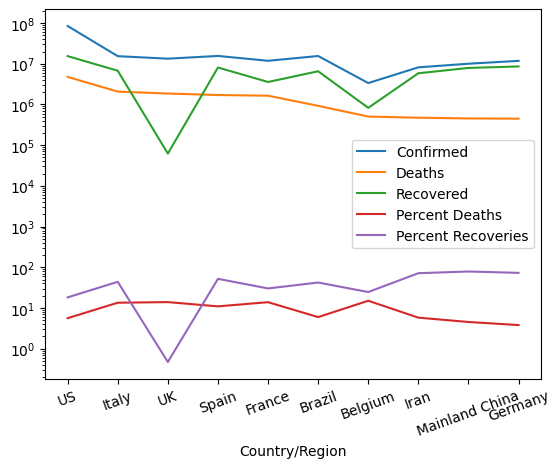

In [82]:
most_death.plot(logy = True)
plt.xticks(range(len(most_death.index)), labels = most_death.index, rotation = 20)

In [83]:
'''14. Least affected countries - Most recoveries'''
high_recov_rate = covid_sum.sort_values(by = ['Percent Recoveries'], ascending = False).head(10)
high_recov_rate.style.background_gradient()

,Confirmed,Deaths,Recovered,Percent Deaths,Percent Recoveries
Country/Region,,,,,
Diamond Princess,55536.000000,964.000000,49801.000000,1.740000,89.670000
Mainland China,10047149.000000,453792.000000,7906544.000000,4.520000,78.690000
Cambodia,9900.000000,0.000000,7736.000000,0.000000,78.140000
Thailand,216391.000000,3563.000000,168633.000000,1.650000,77.930000
Iceland,135370.000000,671.000000,105327.000000,0.500000,77.810000
Saint Lucia,1251.000000,0.000000,965.000000,0.000000,77.140000
New Zealand,103967.000000,1147.000000,79380.000000,1.100000,76.350000
Brunei,11541.000000,90.000000,8776.000000,0.780000,76.040000
Mauritius,23428.000000,691.000000,17164.000000,2.950000,73.260000


In [84]:
'''15 - Observing how regions were affected'''
def resample_region(country_list, region_name):
    regn = []
    rgn_invst = [*zip(country_list, region_name)]
    for countries, regn_name in rgn_invst:
        region = covid_sum.loc[countries]
        # This gives all the regions the same index, which gives them the common unique id to resample by
        region.index = [0 for x in region.index]
        region_agg_sum = region.groupby(region.index).agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum', 'Percent Deaths' : 'mean', 'Percent Recoveries' : 'mean' })
        region_agg_sum.index = [f'{regn_name}']
        regn.append(region_agg_sum)
    all_regns = [x for x in regn]
    regns_agg = pd.concat(all_regns)
    return regns_agg
        

region_affected = resample_region([Asia, North_America, South_America, Europe, Africa, Oceania, Caribbean, Cruise_Ships], ['Asia', 'North America', 'South America', 'Europe', 'Africa', 'Oceania', 'Caribbean', 'Cruise Ships'])
region_affected.sort_values(by = ['Percent Recoveries'], ascending = False).style.background_gradient()

,Confirmed,Deaths,Recovered,Percent Deaths,Percent Recoveries
Oceania,619848.000000,7247.000000,432197.000000,0.572500,66.512500
Asia,27212477.000000,902136.000000,14550860.000000,1.478966,48.976897
Europe,114844910.000000,9781763.000000,45756643.000000,4.855106,46.063404
Cruise Ships,56183.000000,1106.000000,49801.000000,11.845000,44.835000
North America,93142526.000000,5401369.000000,19739150.000000,4.595556,36.753333
Africa,4875458.000000,159963.000000,1906863.000000,2.826667,35.722500
South America,27480729.000000,1302949.000000,11059137.000000,3.631538,32.699231
Caribbean,894034.000000,31113.000000,380044.000000,1.976500,30.822000


In [87]:
'''16 - Investigating the timing of Major Updates in a country'''
# Fixing the date column
covid_2['Last Update'] = pd.to_datetime(covid_2['Last Update'], format='mixed')
covid_2['Last Update'].value_counts()


# Made the date itself the index, this will be useful in the grouping and aggregating the dates
covid_2.index = covid_2['Last Update']
get_day = lambda x: x.day_name()
covid_2.rename(index = get_day, inplace = True)
covid_2.head()

# Getting the frequency of updates in a particular country
group = covid_2.groupby('Country/Region')
grp = group.get_group('Japan')
pd.DataFrame(grp.index.value_counts()).rename_axis('US').style.background_gradient()


,count
US,
Wednesday,115
Saturday,115
Tuesday,115
Thursday,114
Friday,114
Sunday,114
Monday,112


In [91]:
'''17 - Investigating the timing of Major Updates in different regions'''
def region_update_days(region_list, rgn_name):
    listx = []
    rgn_x_name = [*zip(region_list, rgn_name)]
    for rgn, name in rgn_x_name:
        count_3 = covid_2.set_index('Country/Region', drop = False)
        
        c3 = count_3.loc[rgn].set_index('Last Update')
        c3.rename(index = get_day, inplace = True)
        c4 = pd.DataFrame(c3.index.value_counts())
        
        c4.rename_axis(index = 'Update Days', inplace = True)
        c4.rename(columns = {'count' : f'{name}'}, inplace = True)
        listx.append(c4)
    update_info = [x for x in listx]
    update_regions = pd.concat(update_info, axis = 1, sort = False)
    update_regions.sort_values(by = 'Update Days', ascending = False, inplace = True)
    return update_regions#.style.background_gradient()
region_update_days([Asia, North_America, South_America, Europe, Africa, Oceania, Caribbean, Cruise_Ships], ['Asia', 'North America', 'South America', 'Europe', 'Africa', 'Oceania', 'Caribbean', 'Cruise Ships']).style.background_gradient()

,Asia,North America,South America,Europe,Africa,Oceania,Caribbean,Cruise Ships
Update Days,,,,,,,,
Wednesday,1351,1308,432,1594,603,175,168,23
Tuesday,1133,1320,410,1461,575,151,157,22
Thursday,1171,1217,437,1396,541,188,146,21
Sunday,1273,1415,429,1490,659,205,180,26
Saturday,1072,1278,406,1306,510,200,149,20
Monday,1079,1239,393,1274,534,156,146,20
Friday,1185,1215,393,1299,581,160,155,21


<Axes: xlabel='Update Days'>

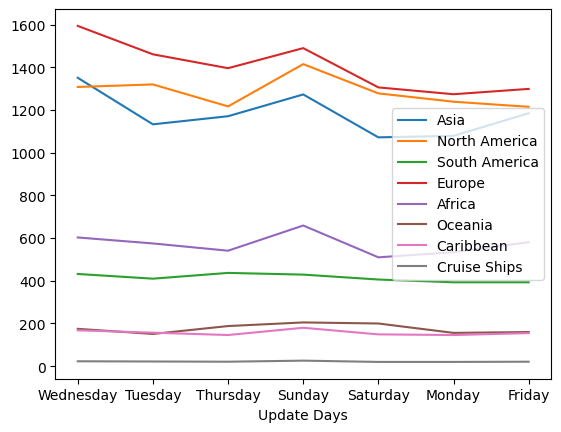

In [92]:
region_update_days([Asia, North_America, South_America, Europe, Africa, Oceania, Caribbean, Cruise_Ships], ['Asia', 'North America', 'South America', 'Europe', 'Africa', 'Oceania', 'Caribbean', 'Cruise Ships']).plot()

In [ ]:
# Extra - The exact countries I used for my report. Investigating how number of deaths varied in countries
# countries = ['Nigeria', 'Japan', 'Mainland China', 'US', 'France', 'Afghanistan']
# country_list = covid['Country/Region'].unique()

# countries_dict = {}
# countries_dict2 = {}
# get_month = lambda x: x.month_name()

# for country in countries:
#     country_group = covid.groupby('Country/Region')
#     country_df = country_group.get_group(country)
#     dfs = country_df.resample('ME', on = 'ObservationDate').agg({'Confirmed' : 'sum', 'Deaths' : 'sum', 'Recovered' : 'sum'})
#     #index = get_month, 
#     dfs.rename(columns = {'Confirmed' : f'{country} Confirmed Cases', 'Deaths' : f'Deaths in {country}', 
#                                            'Recovered' : f'Recoveries in {country}'}, inplace = True)
#     dfs.rename(index = get_month, inplace = True)
#     dfs.rename_axis('Observation Month', inplace = True)
    
#     dfs[f'{country} Confirmed Cases'] = dfs[f'{country} Confirmed Cases'].apply(round)
#     dfs[f'Deaths in {country}'] = dfs[f'Deaths in {country}'].apply(round)
#     dfs[f'Recoveries in {country}'] = dfs[f'Recoveries in {country}'].apply(round)
#     countries_dict2[country] = dfs.style.background_gradient()
#     countries_dict[country] = dfs
#     #dfs.plot()


# # include 2 in dict name to get a styled df

# Japan = countries_dict2['Japan']
# Nigeria = countries_dict['Nigeria']
# Mainland_China = countries_dict['Mainland China']
# France = countries_dict['France']
# Afghanistan = countries_dict['Afghanistan']
# US = countries_dict['US']

# #dfi.export(Japan2, filename = 'bro', table_conversion = 'chrome') 

# #World_df.to_csv('World.csv', index = False)
# #US.to_csv('Nigeria df.csv', index = True)
# # Japan

In [ ]:
# Extra - The exact countries I used for my report
# africa = ['Nigeria', 'Morocco', 'Sudan', 'Rwanda']
# north_america = ['US', 'Canada', 'Mexico']
# central_america  = ['Chile', 'Colombia', 'Argentina', 'Guatemala']
# east_asia_and_oceania = ['Japan', 'South Korea', 'Mainland China', 'Australia']
# europe = ['France', 'UK', 'Italy', 'Denmark']
# middle_east_asia = ['Syria', 'Iran', 'Turkey','Israel']
# asia = ['Indonesia', 'India', 'Philippines', 'Thailand']

In [ ]:
# Extra - Visualizations bruhaha
# fig, ax = plt.subplots(2,3, figsize = (18,12))
# plt.subplots_adjust(wspace = 0.3, hspace = 0.4)

# ax[0,0].plot(data = US, logy = True, marker = 'o')
# for i in range(len(US)):
#     ax[0,0].text(US.index[i], US['US Confirmed Cases'][i], f'{US['US Confirmed Cases'][i]:,}',
#     color = 'blue', fontsize = 10, ha = 'left')
#     ax[0,0].text(US.index[i], US['Recoveries in US'][i], f'{US['Recoveries in US'][i]:,}',
#     color = 'green', fontsize = 10, ha = 'left')
#     ax[0,0].text(US.index[i], US['Deaths in US'][i], f'{US['Deaths in US'][i]:,}',
#     color = 'red', fontsize = 10, ha = 'left')




# # Focusing on visualizations
# plt.figure(figsize = (12, 10))

# #plotting with log scale
# plt.plot(US.index, US['US Confirmed Cases'], label = 'US Confirmed Cases', color = 'blue')
# plt.plot(US.index, US['Recoveries in US'], label = 'Recoveries in US', color = 'green')
# plt.plot(US.index, US['Deaths in US'], label = 'Deaths in US', color = 'red')

# plt.yscale('log')


# for i in range(len(US)):
#     plt.text(US.index[i], US['US Confirmed Cases'][i], f'{US['US Confirmed Cases'][i]:,}',
#     color = 'blue', fontsize = 10, ha = 'left')
#     plt.text(US.index[i], US['Recoveries in US'][i], f'{US['Recoveries in US'][i]:,}',
#     color = 'green', fontsize = 10, ha = 'left')
#     plt.text(US.index[i], US['Deaths in US'][i], f'{US['Deaths in US'][i]:,}',
#     color = 'red', fontsize = 10, ha = 'left')
            
# plt.xlabel('Date')
# plt.ylabel('Cases (log scale)')
# plt.xlabel('COVID- 19 Cases, Recoveries and Deaths (Log Scale)')

# plt.legend()

# plt.show()


In [ ]:
# Extra - Investigating Deaths in Regions
Africa2 = covid_sum.loc[['Nigeria', 'Morocco', 'Sudan', 'Rwanda']]
Africa = covid_sum.loc[['Nigeria', 'Morocco', 'Sudan', 'Rwanda']]
Africa.index = [0 for x in Africa.index]
#Africa.drop(columns = ['Percent Deaths', 'Percent Recoveries'], inplace = True)
Africa_agg_sum = Africa.groupby(Africa.index).agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum', 'Percent Deaths' : 'mean', 'Percent Recoveries' : 'mean' })
Africa_agg_sum.index = ['Africa']
Africa_agg_sum
# col_operation(Africa_agg_sum, 'Deaths', 'Confirmed', 'Percent Deaths')
# col_operation(Africa_agg_sum, 'Recovered', 'Confirmed', 'Percent Recoveries')
# Africa_agg_sum
#operation = [Africa_agg_sum.loc[Africa_agg_sum.index, 'Deaths'] / Africa_agg_sum.loc[Africa_agg_sum.index, 'Confirmed'] * 100]
#operation
#dfi.export(Africa_agg_sum, 'oh')


